In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style="ticks")
# sns.color_palette("rocket", as_cmap=True)
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Processed_Election_Data_WB_AE.csv", low_memory = False)
df = df[['State_Name', 'Assembly_No', 'Constituency_No', 'Year',
       'Position', 'Candidate', 'Sex', 'Party', 'Votes',
       'Age', 'Candidate_Type', 'Valid_Votes', 'Electors', 'Constituency_Name',
       'Constituency_Type', 'District_Name', 'N_Cand', 'Turnout_Percentage',
       'Vote_Share_Percentage', 'Deposit_Lost', 'Margin', 'Margin_Percentage',
       'ENOP', 'last_poll', 'Contested',
       'No_Terms', 'Turncoat', 'Incumbent',
       'Recontest', 'MyNeta_education']]

In [3]:
df.head()

,State_Name,Assembly_No,Constituency_No,Year,Position,Candidate,Sex,Party,Votes,Age,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,District_Name,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,last_poll,Contested,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education
0,West_Bengal,17,1,2021,1,ADHIKARY PARESH CHANDRA,M,AITC,99338.0,68.0,NaN,198744,227630,MEKLIGANJ,SC,COOCH BEHAR,9,87.31,49.98,no,14685.0,7.39,2.33,True,6.0,5.0,True,False,True,12th Pass
1,West_Bengal,17,1,2021,2,DADHIRAM RAY,M,BJP,84653.0,38.0,NaN,198744,227630,MEKLIGANJ,SC,COOCH BEHAR,9,87.31,42.59,no,77800.0,39.15,2.33,True,2.0,0.0,False,False,True,12th Pass
2,West_Bengal,17,1,2021,3,GOBINDA CHANDRA ROY,M,AIFB,6853.0,62.0,NaN,198744,227630,MEKLIGANJ,SC,COOCH BEHAR,9,87.31,3.45,yes,4406.0,2.22,2.33,True,2.0,0.0,False,False,False,Post Graduate
3,West_Bengal,17,1,2021,4,None Of The Above,NaN,NOTA,2447.0,NaN,NaN,198744,227630,MEKLIGANJ,SC,COOCH BEHAR,9,87.31,1.23,NaN,679.0,0.34,2.33,True,NaN,NaN,NaN,NaN,NaN,NaN
4,West_Bengal,17,1,2021,5,RANJIT KUMAR ROY,M,SUCI,1768.0,37.0,NaN,198744,227630,MEKLIGANJ,SC,COOCH BEHAR,9,87.31,0.89,yes,743.0,0.37,2.33,True,1.0,0.0,False,False,False,Graduate


In [4]:
df.loc[df["Sex"]=="Male", "Sex"] ="M"
df.loc[df["Sex"]=="MALE", "Sex"] ="M"
df.loc[df["Sex"]=="male", "Sex"] ="M"
df.loc[df["Sex"]=="female", "Sex"] ="F"
df.loc[df["Sex"]=="FEMALE", "Sex"] ="M"
df["Sex"] = df["Sex"].fillna("NOTA")

<Axes: xlabel='Sex'>

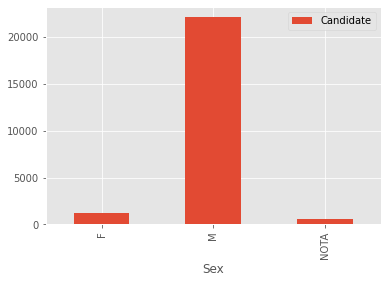

In [18]:
df[["Sex","Candidate"]].groupby("Sex").count().plot(kind="bar")

In [5]:
# fill party NA non number values
df["Party"] = df["Party"].fillna("NOTA")

# fill votes non number values
df["Votes"] = df["Votes"].fillna(0)

# cleaning up candidate types
df["Candidate_Type"] = df["Candidate_Type"].fillna("GENERAL")
df.loc[df["Candidate_Type"]=="GENERAL", "Candidate_Type"] ="GEN"

# remove NaN values from Age
df.loc[df["Sex"]=="NOTA","Age"] = 0 

# Cleaning up age column
df["Age"] = df["Age"].fillna(0)

# Cleaning up education status
df.loc[df["Sex"] == "NOTA", "MyNeta_education"] = "NOTA"
df.MyNeta_education = df.MyNeta_education.fillna("Others")

df.loc[df["Sex"] == "NOTA", "Deposit_Lost"] = "NOTA"
df.loc[df["Sex"] == "NOTA", "Contested"] = "NOTA"
df.loc[df["Sex"] == "NOTA", "No_Terms"] = "NOTA"
df.loc[df["Sex"] == "NOTA", "Turncoat"] = "NOTA"
df.loc[df["Sex"] == "NOTA", "Incumbent"] = "NOTA"
df.loc[df["Sex"] == "NOTA", "Recontest"] = "NOTA"

# cleaning the rest of the columns
df.Margin = df.Margin.fillna(0)
df.Vote_Share_Percentage = df.Vote_Share_Percentage.fillna(0)
df.Margin_Percentage = df.Margin_Percentage.fillna(0)
df.ENOP = df.ENOP.fillna(0)

In [6]:
df.isnull().sum()

State_Name               0
Assembly_No              0
Constituency_No          0
Year                     0
Position                 0
Candidate                0
Sex                      0
Party                    0
Votes                    0
Age                      0
Candidate_Type           0
Valid_Votes              0
Electors                 0
Constituency_Name        0
Constituency_Type        0
District_Name            0
N_Cand                   0
Turnout_Percentage       0
Vote_Share_Percentage    0
Deposit_Lost             0
Margin                   0
Margin_Percentage        0
ENOP                     0
last_poll                0
Contested                0
No_Terms                 0
Turncoat                 0
Incumbent                0
Recontest                0
MyNeta_education         0
dtype: int64

In [7]:
df["Percentage_Votes"] = round((df["Votes"] / df["Valid_Votes"]) * 100, 2)

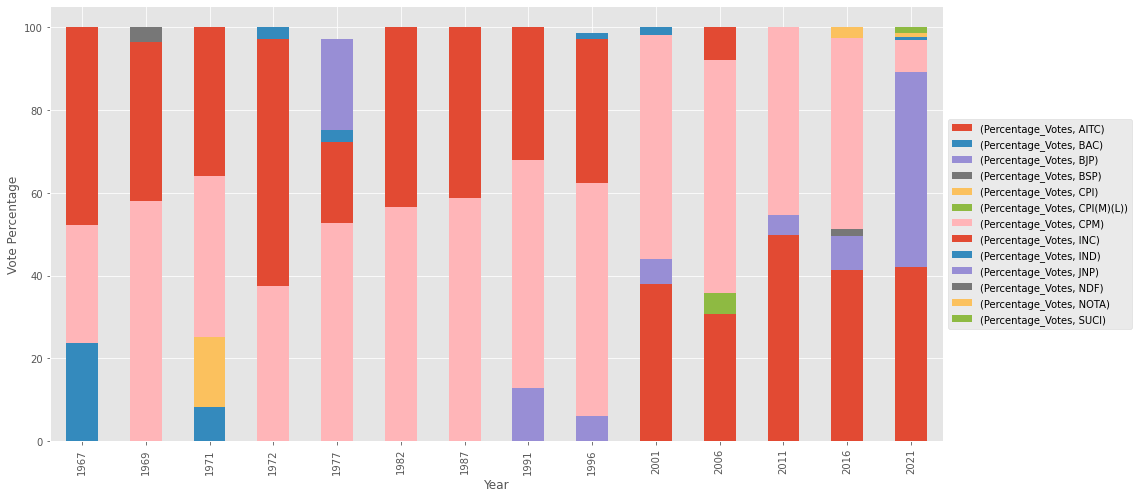

In [8]:
df_sonamukhi = df[df["Constituency_Name"]=="SONAMUKHI"]
df_sonamukhi[["Year","Party","Percentage_Votes"]].groupby(["Year","Party"]).mean().unstack().plot(kind = "bar", stacked = True, ylabel="Vote Percentage", figsize=(16,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

Percentage_Votes
Year Party                  
1962 CPI               52.41
     HMS                5.91
     INC               39.33
     SBP                2.35
1967 CPM               42.70
     INC               50.21
     IND                3.55
1969 CPM               52.90
     INC               47.10
1971 CPI               11.27
     CPM               37.64
     HMS                0.44
     INC               44.94
     NCO                5.71
1972 CPM               38.85
     INC               58.89
     IND                2.26
1977 CPM               57.08
     INC               17.54
     JNP               25.38
1982 CPM               58.47
     INC               39.80
     IND                0.27
     JNP                1.19
1987 CPM               56.70
     INC               42.92
     IND                0.38
1991 BJP                3.05
     CPM               52.64
     INC               43.71
     IND                0.61
1996 BJP                1.92
     CPM               51.69
     INC               46.40
2001 AITC              50.49
     BJP                2.76
     CPM               46.75
2006 AITC              46.77
     CPM               49.32
     INC                3.91
2011 AITC              54.76
     BJP                3.00
     CPM               42.24
2012 AITC              52.11
     BJP                4.38
     CPM               41.72
     RJSP               1.79
2016 AITC              52.82
     BJP                5.87
     CPM               39.45
     NOTA               0.98
     SUCI               0.88
2021 AITC              51.58
     BJP               39.52
     CPM                7.66
     NOTA               0.61
     SUCI               0.62

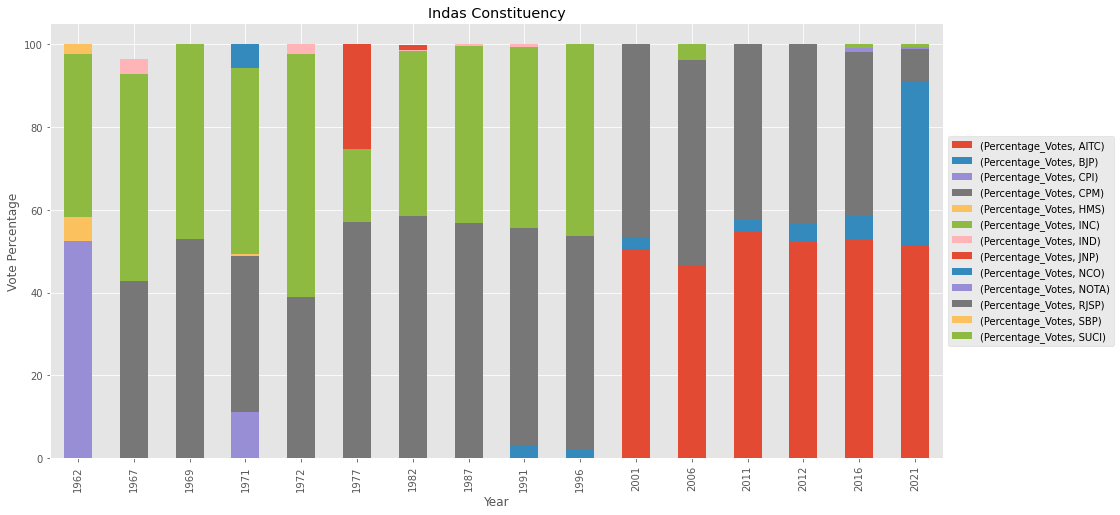

In [9]:
df_sonamukhi = df[df["Constituency_Name"]=="DASPUR"]
display(df_sonamukhi[["Year","Party","Percentage_Votes"]].groupby(["Year","Party"]).mean())
df_sonamukhi[["Year","Party","Percentage_Votes"]].groupby(["Year","Party"]).mean().unstack().plot(
    kind = "bar", stacked = True, ylabel="Vote Percentage", figsize=(16,8), title= "Indas Constituency")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

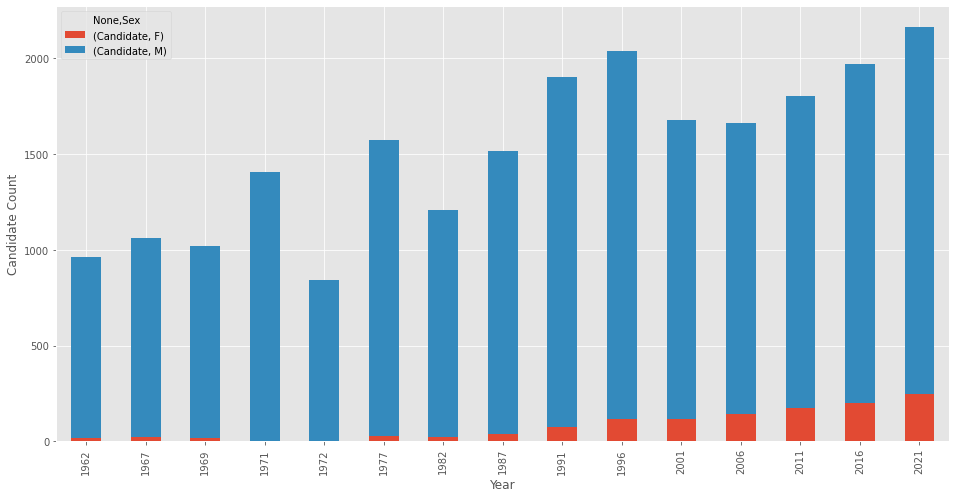

In [10]:
major_elections = [1962, 1967, 1969, 1971, 1972, 1977, 1982, 1987, 1991, 1996, 2001, 2006, 2011, 2016, 2021]
df_mf_count = df[["Year", "Sex", "Candidate"]]
df_mf_count = df_mf_count[df_mf_count["Sex"] != "NOTA"]
df_mf_count = df_mf_count[df_mf_count["Year"].isin(major_elections)]
df_mf_count.groupby(["Year", "Sex"]).count().unstack().plot(
    kind ="bar", 
    stacked=True, 
    figsize=(16,8), ylabel = "Candidate Count");

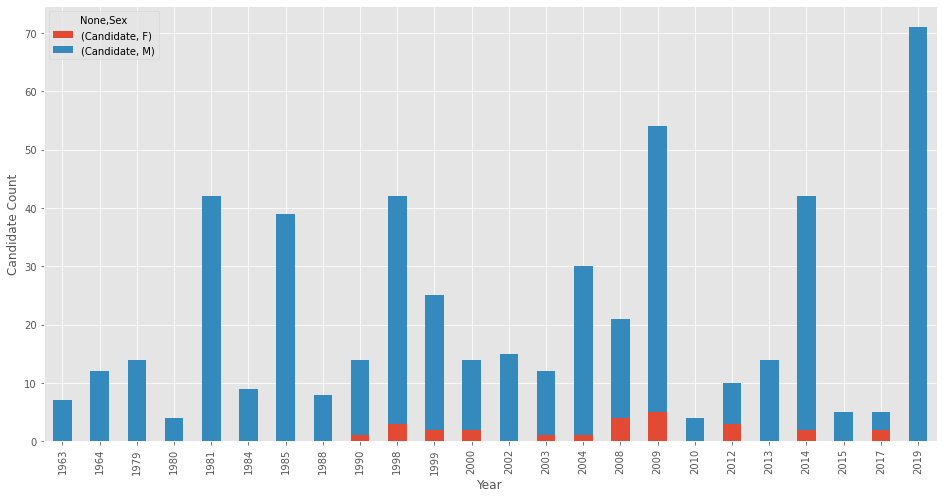

In [11]:
df_mf_count = df[["Year", "Sex", "Candidate"]]
df_mf_count = df_mf_count[df_mf_count["Sex"] != "NOTA"]
df_mf_count = df_mf_count[~df_mf_count["Year"].isin(major_elections)]
df_mf_count.groupby(["Year", "Sex"]).count().unstack().plot(
    kind ="bar", 
    stacked=True, 
    figsize=(16,8), ylabel = "Candidate Count");

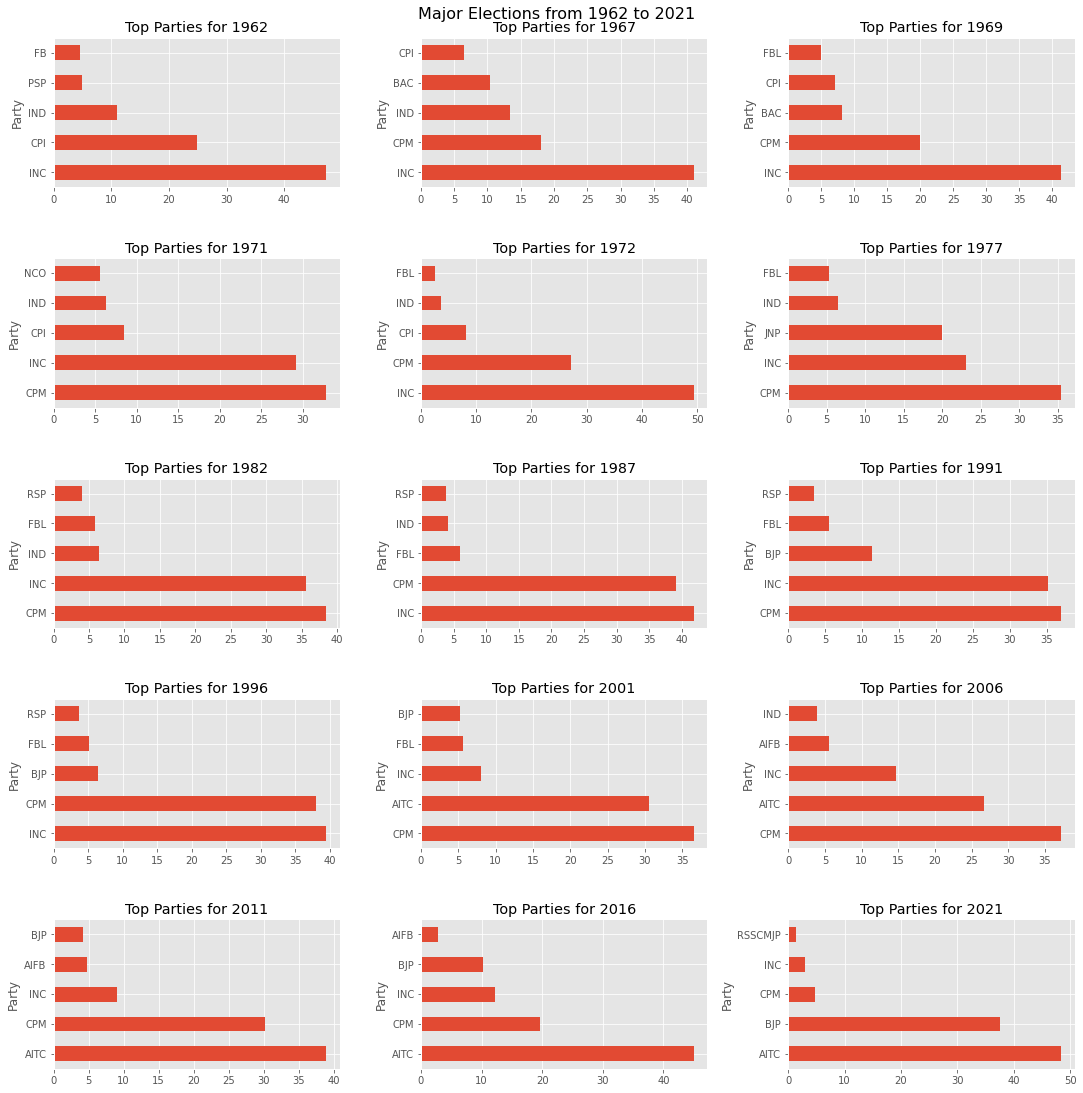

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 16))
fig.tight_layout(pad=5.0)
fig.suptitle('Major Elections from 1962 to 2021', fontsize=16)

year_iter = iter(major_elections)
for r in range(5):
    for c in range(3):
        year = next(year_iter)
        df_votes_year = df[df["Year"] == year][["Party", "Votes"]]
        df_votes_year["Votes_Share"] = round((df_votes_year["Votes"] / df_votes_year["Votes"].sum())*100,2)
        df_votes_year = df_votes_year[["Party","Votes_Share"]].groupby("Party").sum().apply(lambda x: x.sort_values(ascending=False)).head(5)
        df_votes_year.plot(kind='barh', ylabel = "Vote Percentage", xlabel = "Party", legend = None, title=f"Top Parties for {year}", ax = axes[r,c])

## Observations
1. Strong political shift between 1969 to 1977
2. 1972 to 1996 was a strong fight between CPM and INC
3. Politics began to shift from 2001 to 2011
4. Started to shift again from 2016

Let's look at the scenario between 1969 to 1977 and see how this shift happened and where did this shift happen

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


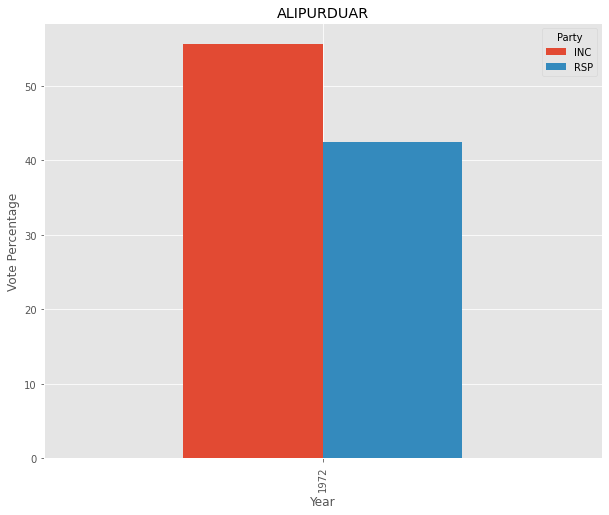

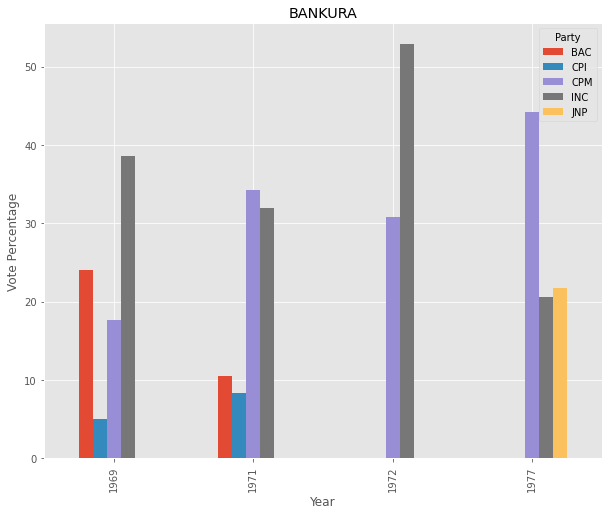

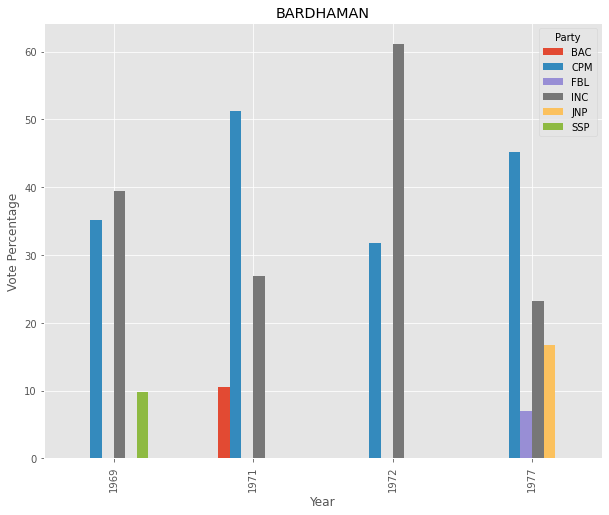

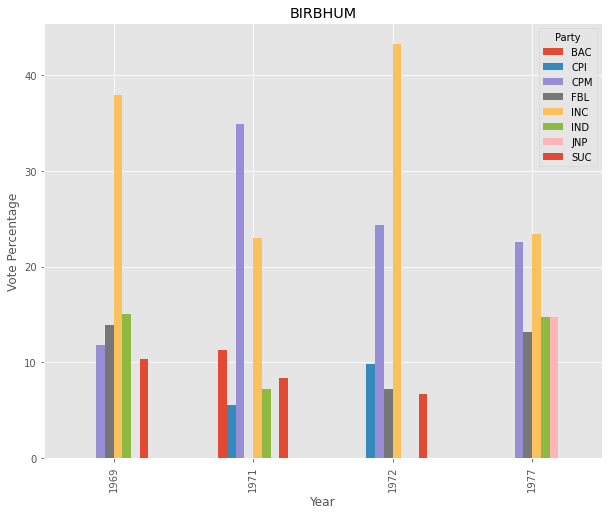

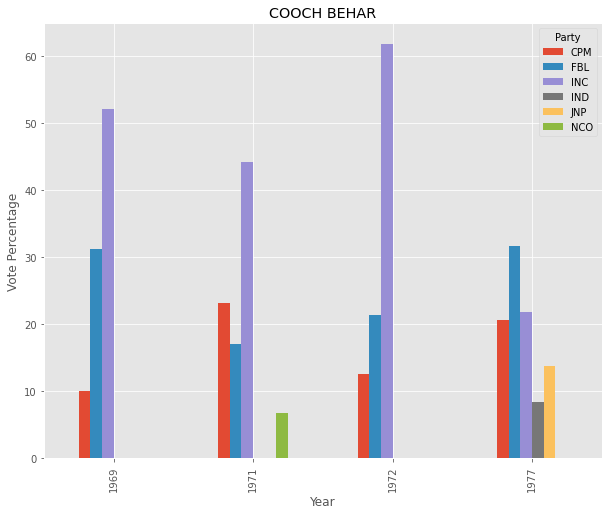

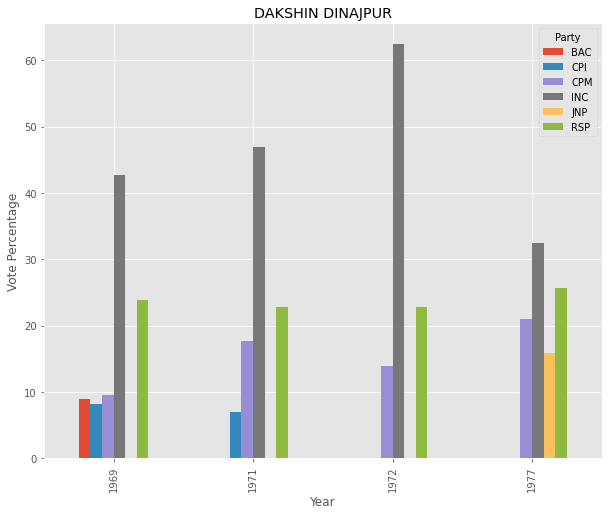

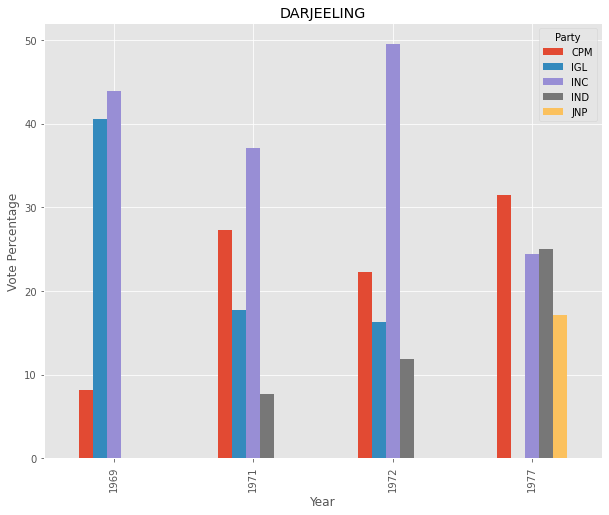

Error in callback <function flush_figures at 0x113d3d900> (for post_execute):



KeyboardInterrupt



In [13]:
df_district_wise = df[["District_Name", "Votes", "Year", "Party"]]
df_district_wise = df_district_wise[df_district_wise["Year"].between(1969, 1978)]
df_district_wise = df_district_wise[df_district_wise["Party"] != "NOTA"]
df_district_wise = df_district_wise[df_district_wise["District_Name"] != "NOTA"]
df_district_wise = df_district_wise[df_district_wise["District_Name"] != "Others"]
for year in df_district_wise.Year.unique():
    for district in df_district_wise.District_Name.unique():
        df_dp = df_district_wise[(df_district_wise["Year"] == year) & (df_district_wise["District_Name"] == district)]
        total_votes = df_dp["Votes"].sum()
        df_district_wise.loc[(df_district_wise["Year"] == year) & (df_district_wise["District_Name"] == district), "Votes_Share"] = round(df_dp["Votes"] / total_votes * 100, 2)
df_district_wise = df_district_wise[["District_Name", "Year", "Party", "Votes_Share"]].groupby(["District_Name", "Year", "Party"]).sum().reset_index()

df_district_wise = df_district_wise[df_district_wise["Votes_Share"] >= 5]
for district in df_district_wise.District_Name.unique():
    df_district_wise[df_district_wise["District_Name"] == district].pivot(index="Year", columns="Party", values="Votes_Share").plot(kind = "bar", title=district, ylabel="Vote Percentage", xlabel="Year", figsize=(10,8))